In [1]:
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import random

import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 导入FontProperties
import warnings
warnings.filterwarnings("ignore")

In [10]:
path1 = r'E:\netData\MAG-nobel\Nobel papers CD.zip'
path2 = r'E:\netData\MAG-nobel\2 Nobel papers counterparts\Nobel counterparts CD.zip'

In [11]:
fNobel = pd.read_csv(path1)
fControl = pd.read_csv(path2)

In [12]:
fNobel['type']='Nobel-winning papers'
fControl['type']='Control group papers'

In [13]:
fNobel

,paperid,paperyear,ref,cit,journal,doi,oecd1,oecd2,AUnum,volume,...,lastpage,title,CD,DIsharp,DIeasy,ni,nj,nk,Field,type
0,2086860422,1973.0,17.0,5209.0,Journal of Physics C: Solid State Physics,10.1088/0022-3719/6/7/010,1. Natural Sciences,1.03 Physical sciences and astronomy,2.0,6.0,...,1203.0,ordering metastability and phase transitions i...,0.160144,0.263410,0.718372,3742,1467,8997,Physics,Nobel-winning papers
1,2113166233,1983.0,NaN,2080.0,Physical Review Letters,10.1103/PhysRevLett.50.1153,1. Natural Sciences,1.03 Physical sciences and astronomy,1.0,50.0,...,1156.0,nonlinear field theory of large spin heisenber...,1.000000,1.000000,1.000000,2080,0,0,Physics,Nobel-winning papers
2,2134803267,1998.0,1.0,3354.0,Physical Review Letters,10.1103/PhysRevLett.81.1562,1. Natural Sciences,1.03 Physical sciences and astronomy,125.0,81.0,...,1567.0,evidence for oscillation of atmospheric neutrinos,0.924806,0.945549,0.978533,3282,72,117,Physics,Nobel-winning papers
3,1983987483,2002.0,NaN,2109.0,Physical Review Letters,10.1103/PhysRevLett.89.011301,1. Natural Sciences,1.03 Physical sciences and astronomy,206.0,89.0,...,11301.0,direct evidence for neutrino flavor transforma...,1.000000,1.000000,1.000000,2109,0,0,Physics,Nobel-winning papers
4,2137229134,2001.0,8.0,1396.0,Physical Review Letters,10.1103/PhysRevLett.87.071301,1. Natural Sciences,1.03 Physical sciences and astronomy,206.0,87.0,...,71301.0,measurement of the rate of ve d p p e interact...,0.170847,0.339149,0.668338,933,463,1355,Physics,Nobel-winning papers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2110457661,1919.0,NaN,409.0,The Journal of Physiology,10.1113/jphysiol.1919.sp001844,1. Natural Sciences,1.04 Chemical sciences,1.0,52.0,...,474.0,the supply of oxygen to the tissues and the re...,1.000000,1.000000,1.000000,409,0,0,Medicine,Nobel-winning papers
708,142463470,1910.0,NaN,234.0,Annals of Surgery,10.1097/00000658-191007000-00009,3. Medical and Health Sciences,3.02 Clinical medicine,1.0,52.0,...,95.0,viii on the experimental surgery of the thorac...,1.000000,1.000000,1.000000,234,0,0,Medicine,Nobel-winning papers
709,2052889597,1908.0,NaN,158.0,JAMA,10.1001/jama.1983.03340070050029,3. Medical and Health Sciences,3.02 Clinical medicine,1.0,250.0,...,953.0,results of the transplantation of blood vessel...,1.000000,1.000000,1.000000,158,0,0,Medicine,Nobel-winning papers
710,2067983941,1906.0,NaN,50.0,The American Journal of the Medical Sciences,10.1097/00000441-190609000-00006,3. Medical and Health Sciences,3.02 Clinical medicine,2.0,132.0,...,422.0,results of the biterminal transplantation of v...,1.000000,1.000000,1.000000,50,0,0,Medicine,Nobel-winning papers


# 作图

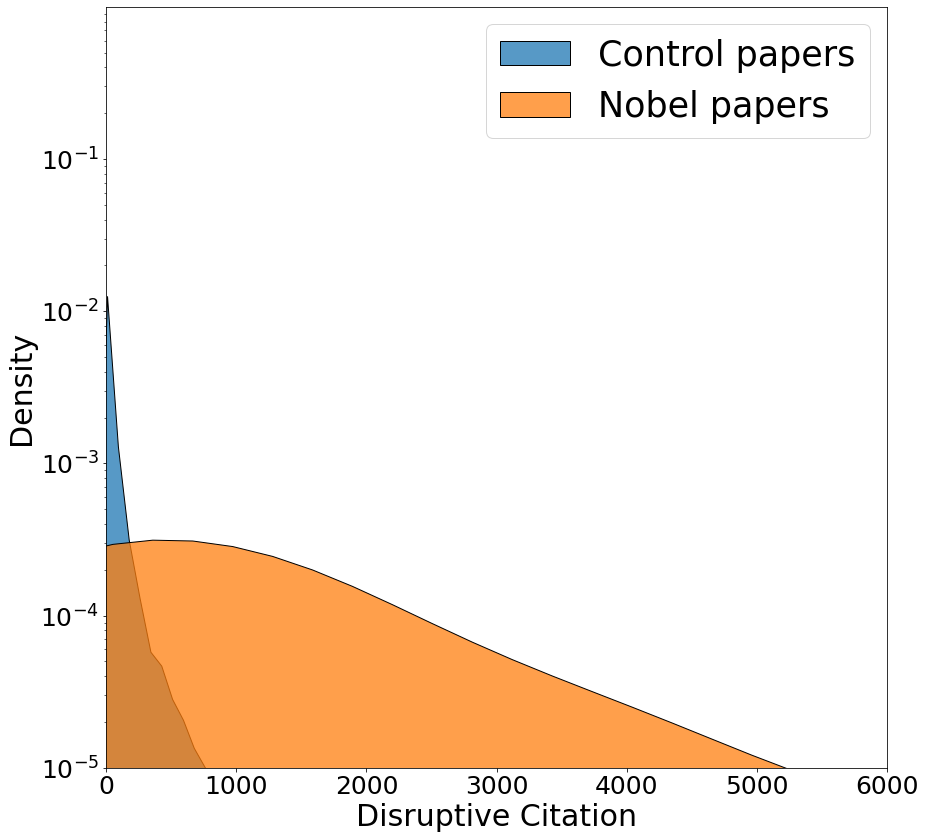

In [16]:
f, ax = plt.subplots(figsize=(14, 14))
sns.kdeplot(data=fControl, x="ni", multiple="stack",palette="crest",label='Control papers')
sns.kdeplot(data=fNobel, x="ni", multiple="stack",palette="plasma",label='Nobel papers')
#ax.set_xscale("log")
ax.set_yscale("log")
plt.ylim((10e-6,10e-1))
plt.xlim((0,6000))
plt.xticks(size = 25)
plt.yticks([10e-2,10e-3,10e-4,10e-5,10e-6],size = 25)
plt.legend(fontsize = 35)
plt.xlabel(r'Disruptive Citation',fontsize = 30)
plt.ylabel(r'Density',fontsize = 30)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig B3\a1.pdf",bbox_inches = 'tight')

In [17]:
fNobel = fNobel[fNobel['CD']==1]
fControl = fControl[fControl['CD']==1]

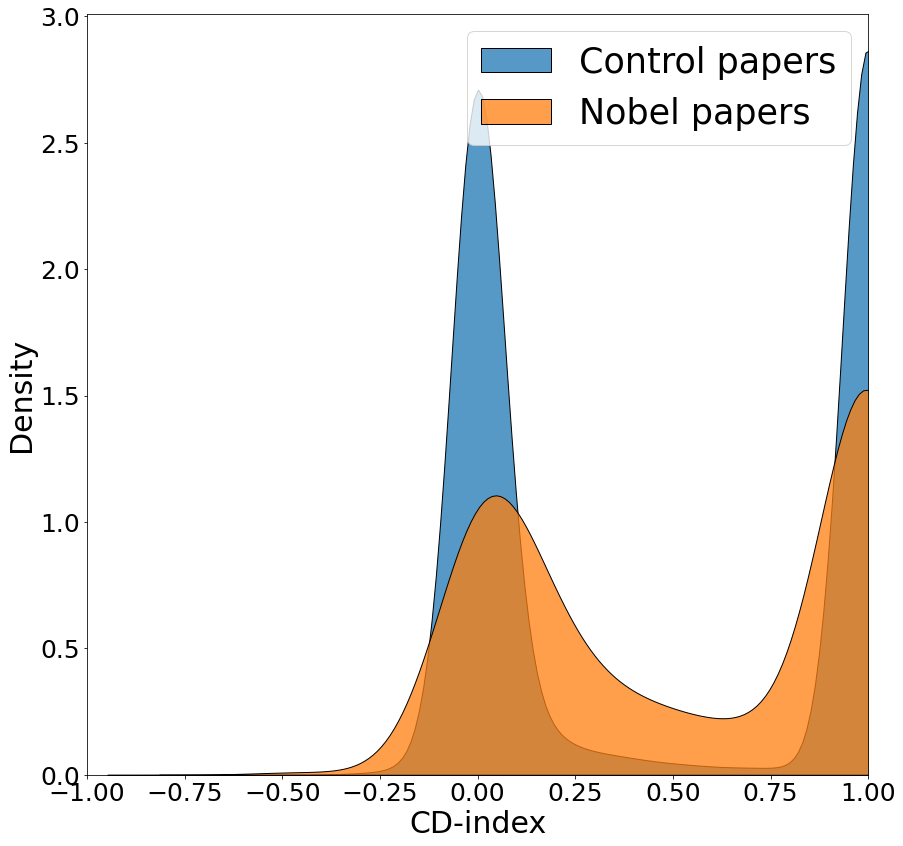

In [15]:
f, ax = plt.subplots(figsize=(14, 14))
sns.kdeplot(data=fControl, x="CD", multiple="stack",palette="crest",label='Control papers')
sns.kdeplot(data=fNobel, x="CD", multiple="stack",palette="plasma",label='Nobel papers')
#ax.set_xscale("log")
#ax.set_yscale("log")
#plt.ylim((10e-6,10e0))
plt.xlim((-1,1))
plt.xticks(size = 25)
plt.yticks(size = 25)
plt.legend(fontsize = 35)
plt.xlabel(r'CD-index',fontsize = 30)
plt.ylabel(r'Density',fontsize = 30)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig B3\a3.pdf",bbox_inches = 'tight')

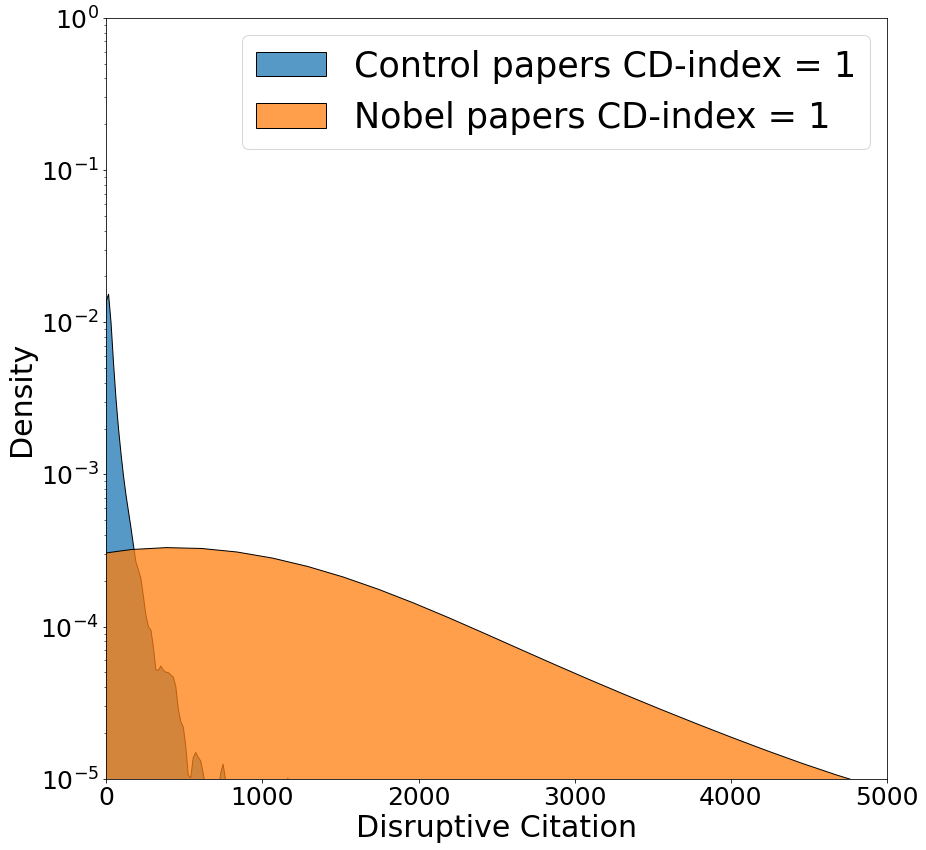

In [18]:
f, ax = plt.subplots(figsize=(14, 14))
sns.kdeplot(data=fControl, x="ni", multiple="stack",palette="crest",label='Control papers CD-index = 1')
sns.kdeplot(data=fNobel, x="ni", multiple="stack",palette="plasma",label='Nobel papers CD-index = 1')
#ax.set_xscale("log")
ax.set_yscale("log")
plt.ylim((10e-6,10e-1))
plt.xlim((0,5000))
plt.xticks(size = 25)
plt.yticks([10e-1,10e-2,10e-3,10e-4,10e-5,10e-6],size = 25)
plt.legend(fontsize = 35)
plt.xlabel(r'Disruptive Citation',fontsize = 30)
plt.ylabel(r'Density',fontsize = 30)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig B3\a2.pdf",bbox_inches = 'tight')